# **Часть 1: Теоретический разбор и базовая реализация**

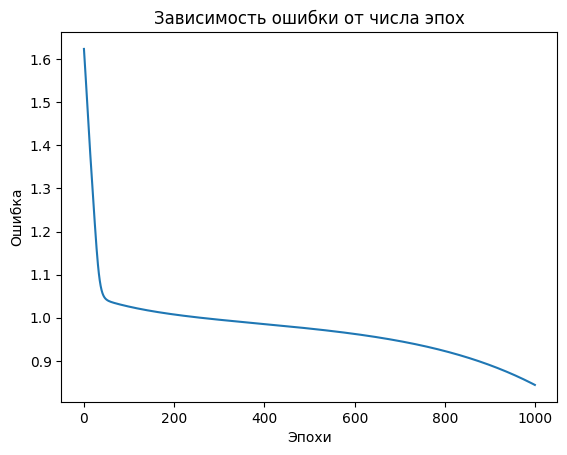

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Инициализация параметров
input_size = 2
hidden_size = 10
output_size = 2
learning_rate = 0.1
epochs = 1000

# Инициализация весов
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Функция активации (сигмоида)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Производная сигмоиды
def sigmoid_derivative(x):
    return x * (1 - x)

# Прямое распространение
def forward_pass(X):
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)
    output_input = np.dot(hidden_output, W2) + b2
    output = sigmoid(output_input)
    return hidden_output, output

# Обратное распространение
def backward_pass(X, y, hidden_output, output):
    global W1, W2, b1, b2
    error = output - y
    d_output = error * sigmoid_derivative(output)
    error_hidden = d_output.dot(W2.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Обновление весов
    W2 -= hidden_output.T.dot(d_output) * learning_rate
    b2 -= np.sum(d_output, axis=0) * learning_rate
    W1 -= X.T.dot(d_hidden) * learning_rate
    b1 -= np.sum(d_hidden, axis=0) * learning_rate

# Квадратичная функция потерь
def loss(y_true, y_pred):
    return 0.5 * np.sum((y_true - y_pred) ** 2)

# Данные
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0, 1], [1, 0], [1, 0], [0, 1]])

# Обучение
loss_history = []
for epoch in range(epochs):
    hidden_output, output = forward_pass(X)
    backward_pass(X, y, hidden_output, output)
    loss_history.append(loss(y, output))

# Визуализация
plt.plot(loss_history)
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.title('Зависимость ошибки от числа эпох')
plt.show()

# **Часть 2: Методы оптимизации и эксперименты**

Применение методов оптимизации

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# Загрузка данных MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Создание модели
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Список оптимизаторов
optimizers = {
    'SGD': SGD(learning_rate=0.01),
    'Adam': Adam(learning_rate=0.01),
    'RMSprop': RMSprop(learning_rate=0.01),
    'Momentum': SGD(learning_rate=0.01, momentum=0.9)
}

# Обучение с разными оптимизаторами и сохранение истории
history = {}
for name, optimizer in optimizers.items():
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    print(f"Обучение с {name}")
    history[name] = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Обучение с SGD
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7110 - loss: 1.0367 - val_accuracy: 0.9092 - val_loss: 0.3144
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9114 - loss: 0.3080 - val_accuracy: 0.9283 - val_loss: 0.2510
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9279 - loss: 0.2512 - val_accuracy: 0.9371 - val_loss: 0.2184
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9399 - loss: 0.2080 - val_accuracy: 0.9430 - val_loss: 0.1919
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9479 - loss: 0.1840 - val_accuracy: 0.9487 - val_loss: 0.1708
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9527 - loss: 0.1658 - val_accuracy: 0.9537 - val_loss: 0.1552
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9564 - loss: 0.1544 - val_accuracy: 0.9565 - val_loss: 0.1481
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.961

Визуализация

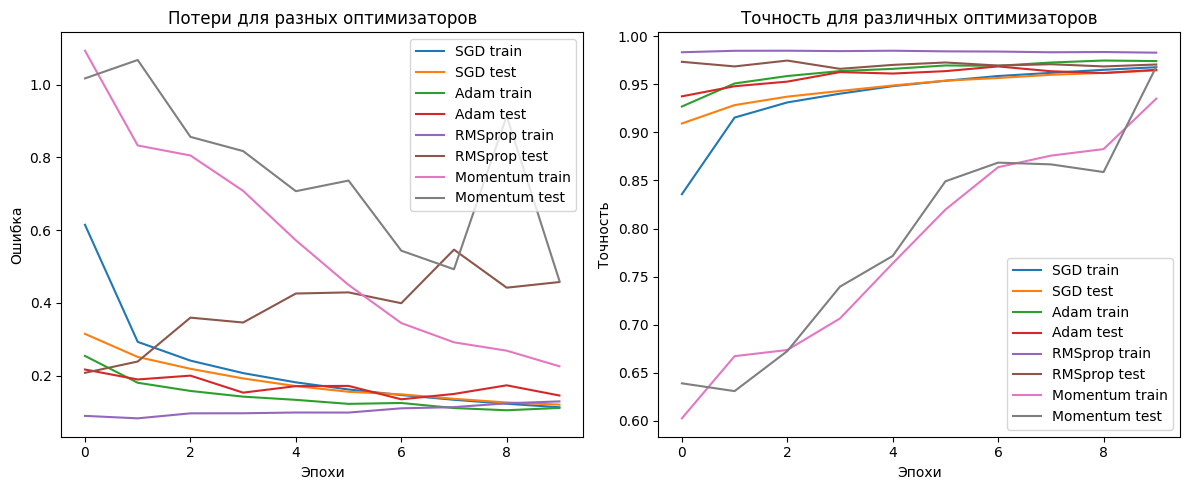

In [ ]:
# Визуализация потерь и точности
plt.figure(figsize=(12, 5))

# График потерь
plt.subplot(1, 2, 1)
for name, hist in history.items():
    plt.plot(hist.history['loss'], label=f'{name} train')
    plt.plot(hist.history['val_loss'], label=f'{name} test')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.title('Потери для разных оптимизаторов')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
for name, hist in history.items():
    plt.plot(hist.history['accuracy'], label=f'{name} train')
    plt.plot(hist.history['val_accuracy'], label=f'{name} test')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.title('Точность для различных оптимизаторов')
plt.legend()

plt.tight_layout()
plt.show()

Эксперименты с параметрами

In [ ]:
# Эксперименты с learning rate и batch size для Adam
learning_rates = [0.1, 0.01, 0.001]
batch_sizes = [16, 32, 64]

results = {}
for lr in learning_rates:
    for batch_size in batch_sizes:
        model.compile(optimizer=Adam(learning_rate=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(train_images, train_labels, epochs=10, batch_size=batch_size, validation_data=(test_images, test_labels))
        results[(lr, batch_size)] = history.history['val_accuracy'][-1]

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.1042 - loss: 2.3198 - val_accuracy: 0.0958 - val_loss: 2.3184
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.1057 - loss: 2.3190 - val_accuracy: 0.1028 - val_loss: 2.3158
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.1011 - loss: 2.3202 - val_accuracy: 0.0982 - val_loss: 2.3260
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.1018 - loss: 2.3187 - val_accuracy: 0.0892 - val_loss: 2.3229
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.1046 - loss: 2.3194 - val_accuracy: 0.0892 - val_loss: 2.3216
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.1031 - loss: 2.3201 - val_accuracy: 0.0958 - val_loss: 2.3274
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.1030 - loss: 2.3198 - val_accuracy: 0.0958 - val_loss: 2.3310
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.1030 - loss: 2

In [ ]:
# Вывод результатов
for params, accuracy in results.items():
    print(f"Learning rate: {params[0]}, Batch size: {params[1]}, Accuracy: {accuracy}")

Learning rate: 0.1, Batch size: 16, Accuracy: 0.0957999974489212
Learning rate: 0.1, Batch size: 32, Accuracy: 0.09799999743700027
Learning rate: 0.1, Batch size: 64, Accuracy: 0.11349999904632568
Learning rate: 0.01, Batch size: 16, Accuracy: 0.10279999673366547
Learning rate: 0.01, Batch size: 32, Accuracy: 0.11349999904632568
Learning rate: 0.01, Batch size: 64, Accuracy: 0.11349999904632568
Learning rate: 0.001, Batch size: 16, Accuracy: 0.11349999904632568
Learning rate: 0.001, Batch size: 32, Accuracy: 0.11349999904632568
Learning rate: 0.001, Batch size: 64, Accuracy: 0.11349999904632568


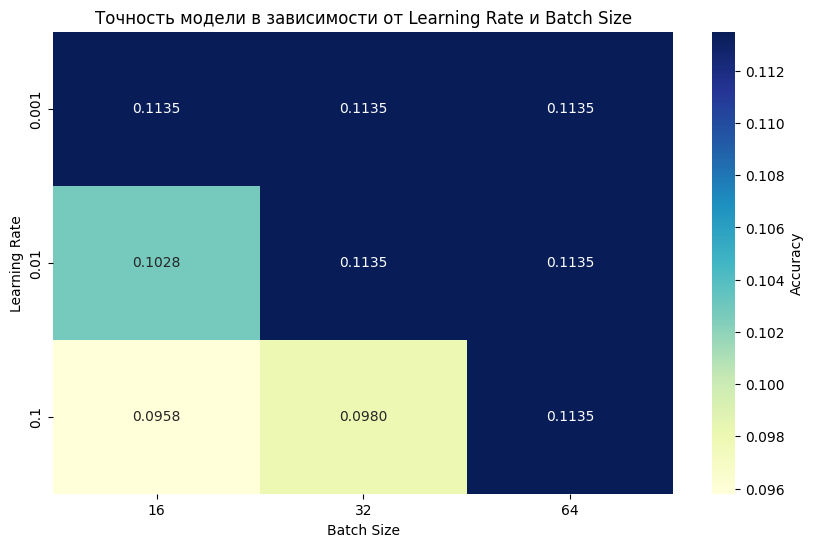

In [ ]:
import seaborn as sns
import pandas as pd

# Преобразуем результаты в DataFrame для удобства визуализации
lr_list = []
batch_list = []
accuracy_list = []

for (lr, batch_size), accuracy in results.items():
    lr_list.append(lr)
    batch_list.append(batch_size)
    accuracy_list.append(accuracy)

data = pd.DataFrame({
    'Learning Rate': lr_list,
    'Batch Size': batch_list,
    'Accuracy': accuracy_list
})

# Создаем сводную таблицу для тепловой карты
pivot_table = data.pivot(index='Learning Rate', columns='Batch Size', values='Accuracy')

# Визуализация тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="YlGnBu", cbar_kws={'label': 'Accuracy'})
plt.title('Точность модели в зависимости от Learning Rate и Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Learning Rate')
plt.show()